In [16]:
from agents.monte_carlo import MonteCarloAgent
from environment import TreasureCube

In [17]:
def test_cube(max_episode, max_step):
    env = TreasureCube(max_step=max_step)
    agent = MonteCarloAgent()

    episode_reward_progress = []
    episode_log = []

    for episode_num in range(max_episode):
        terminate = False
        no_of_steps = 0
        episode_reward = 0
        episode = []

        current_state = env.reset()

        while not terminate:
            action = agent.take_action(current_state)
            reward, terminate, next_state = env.step(action)
            episode_reward += reward
            # you can comment the following two lines, if the output is too much
            # env.render()  # comment
            # print(f'step: {t}, action: {action}, reward: {reward}')  # comment
            no_of_steps += 1
            episode.append((current_state, action, reward))
            current_state = next_state

        log = f'episode: {episode_num}, total_steps: {no_of_steps} episode reward: {episode_reward}'
        episode_log.append(log)
        episode_reward_progress.append(episode_reward)

        agent.train(episode)

    
    return episode_reward_progress, episode_log

In [18]:
episode_reward_progress, episode_log = test_cube(50000, 500)

In [19]:
with open('./episode_logs.txt', 'w') as f:
    for log in episode_log:
        f.write(f'{log}\n')

In [20]:
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure

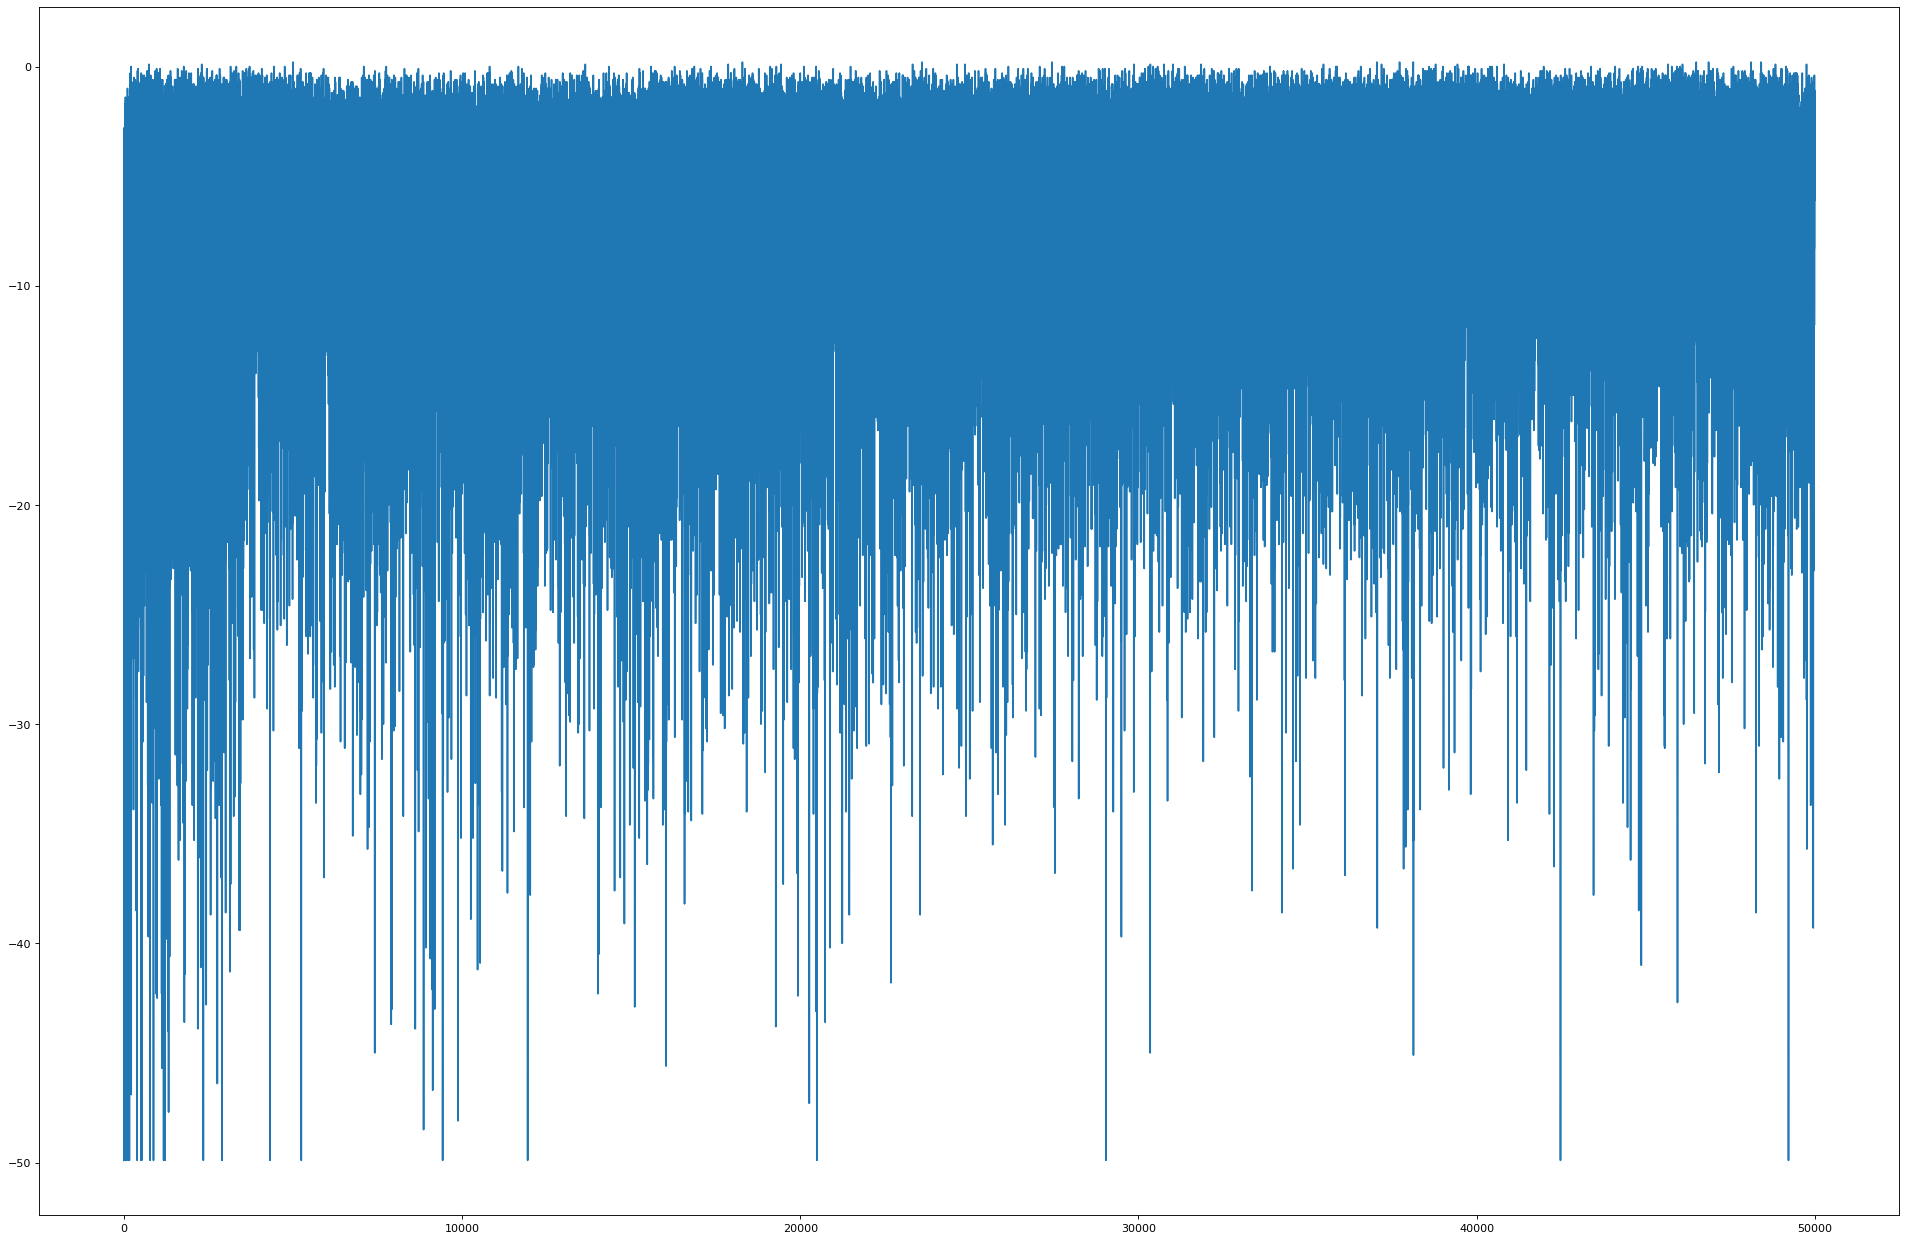

In [21]:
figure(num=None, figsize=(30, 20), dpi=80)
plt.plot([i for i in range(len(episode_reward_progress))], episode_reward_progress)
plt.show()